In [1]:
import jax
import jax.numpy as jnp
import flax.linen as nn

In [35]:
class Model(nn.Module):
    @nn.compact
    def __call__(self, x):
        pos_encoding = jnp.arange(1, 1 + len(x))[:, None] % jnp.arange(1, 4)
        q = nn.Dense(8)(pos_encoding)
        k = nn.Dense(8)(pos_encoding)
        v = nn.Dense(1)(pos_encoding)
        return (jax.nn.softmax(q@k.T) @ v)[:, 0]

In [112]:
m = Model()
x = jnp.arange(5)
p = m.init(jax.random.PRNGKey(0), x)

In [113]:
target = jnp.arange(1, 6)

In [114]:
def loss(params):
    # print(m.apply(params, x).shape, target.shape)
    # print((m.apply(params, x) - target)**2)
    return jnp.mean((m.apply(params, x) - target)**2)

In [115]:
import optax
optimizer = optax.contrib.prodigy()
optimizer = optax.adam(1e-1)
state = optimizer.init(p)

@jax.jit
def update(p, state):
    l, g = jax.value_and_grad(loss)(p)
    updates, state = optimizer.update(g, state, p)
    return l, optax.apply_updates(p, updates), state

In [116]:
for i in range(1000):
    l, p, state = update(p, state)
    if i % 100 == 0:
        print(l)

17.24246
2.0001512
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


In [111]:
m.apply(p, x)

Array([3., 3., 3., 3., 3.], dtype=float32)

In [1]:
from sparse_wf.system import database

In [25]:
import numpy as np
mol = database('5c2f1fbbfe629463e3a4eba88c136f28')
mol.basis = '6-311G(d)'
mol.build()
mf = mol.UHF()
mf.run()
np.max(np.abs(mf.mo_coeff[0][:, :(mf.mo_occ > 0).sum()] - mf.mo_coeff[1][:, :(mf.mo_occ > 0).sum()]))

converged SCF energy = -153.593385663444  <S^2> = 1.2081276e-07  2S+1 = 1.0000002


0.000573075693295344

In [13]:
mol = database('5c2f1fbbfe629463e3a4eba88c136f28')
mol.basis = '6-311G(d)'
mol.build()
mf = mol.RHF()
mf.run()

converged SCF energy = -153.593385662982


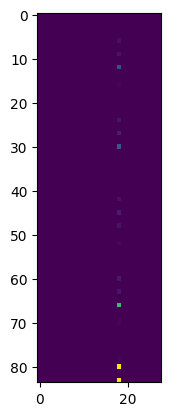

In [24]:
import matplotlib.pyplot as plt
plt.imshow(np.abs(mf.mo_coeff[0][:, :(mf.mo_occ > 0).sum()] - mf.mo_coeff[1][:, :(mf.mo_occ > 0).sum()]))